# Linear Regression with Python

***By Alex Borio***

<img src="https://blog.anybox.fr/content/images/size/w1140/2020/01/scikit-learn-1.png" alt="350" width="400" align="left"/>

## Introduzione

It is a Supervised Machine Learning model that tries to find out the best possible linear relationship between the input features (X) and the target variable (y). Formula:

#### y= aX + b + 𝜀


**It optimizes slope a and intercept b by reducing the residuals between the actual y and the predicted y.**

To get the best weights/parameters, we usually minimize the sum of squared residuals (SSR) for all observations.

The linear relation between the input features and the output in <u>2D is simply a line.</u>

**Formula - Legend:**

- y is the predicted value of the dependent variable (y) for any given value of the independent variable (x).
- b is the intercept, the predicted value of y when the x is 0.
- a is the regression coefficient – how much we expect y to change as x increases.
- X is the independent variable ( the variable we expect is influencing y).
- 𝜀 is the error term (The distance between each point and the line, so the variation in the dependent variable not explained by the independent variables.)


<img src="https://github.com/lorisliusso/Machine-Learning-with-Python/blob/master/formula%20linear_reg%202d.png?raw=true" alt="400" width="600" align="left"/>


## How Does it Work?
Python has methods for finding a relationship between data-points and to draw a line of linear regression. We will show you how to use these methods instead of going through the mathematic formula.

In the example below, the x-axis represents age, and the y-axis represents speed. We have registered the age and speed of 13 cars as they were passing a tollbooth. Let us see if the data we collected could be used in a linear regression:

## Example

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # to split the dataset into training and testing sets
from sklearn.linear_model import LinearRegression # to perform linear regression
from sklearn.metrics import mean_squared_error, mean_absolute_error # to calculate the error
import pandas as pd

In [7]:
# Display information about the DataFrame
# Ensures reproducibility by fixing the random seed (42 is the seed value). The seed is an integer that serves as 
# the starting point for the random number sequence
np.random.seed(42) 

# array of 300 random integers between 0 and 60 (represents dog ages in months)
ages = np.random.randint(0, 60, size=300)

# weights array is generated using a linear relationship with ages array and additional random noise
weights = 10 + 0.5 * ages + np.random.normal(0, 5, size=300)

In [8]:
# Convert the generated data into a pandas DataFrame.
df = pd.DataFrame({'Age': ages, 'Weight': weights})

In [9]:
# Display information about the DataFrame
print("DataFrame Shape:", df.shape)
print("\nDataFrame Head:")
print(df.head())
print("\nDataFrame Description:")
print(df.describe())

DataFrame Shape: (300, 2)

DataFrame Head:
   Age     Weight
0   38  26.532838
1   51  40.115813
2   28  32.533025
3   14  21.367947
4   42  31.045722

DataFrame Description:
              Age      Weight
count  300.000000  300.000000
mean    29.930000   25.826362
std     17.793081   10.197088
min      0.000000    1.645671
25%     14.000000   18.017262
50%     31.000000   26.183281
75%     44.000000   33.768457
max     59.000000   47.301901


In [10]:
# Reshape the data 
ages_reshaped = df['Age'].values.reshape(-1, 1)

# ages_reshaped = ages.reshape(-1, 1)
weights = df['Weight'].values

The **reshape(-1, 1)** method is used to transform the one-dimensional array into a two-dimensional array with one column. The **-1** argument automatically infers the number of rows based on the array`s length.

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ages_reshaped, weights, test_size=0.2, random_state=42)

We utilized function **train_test_split** with parameters **test_size = 0.2** (20% of the data is for testing and 80% is for training) and **random_state = 42** (reproducibility in the split). **X_train** and **X_test** are the input features for training and testing, while **y_train** and **y_test** are the corresponding target values (labels) for training and testing.

In [12]:
# Create an instance of the LinearRegression class
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

LinearRegression()

Linear regression model finds the best value for the intercept and slope, which results in a line that best fits the data. To retrieve the value of the intercept and slope / coefficients calculated by the linear regression algorithm for our dataset, execute the following script:

In [13]:
# Get coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print coefficients and intercept
print(f'\nCoefficients: {coefficients}') # Out: Coefficients: [0.49967695]
print(f'Intercept: {intercept}') # Out: Intercept: 10.731323827720102


Coefficients: [0.49967695]
Intercept: 10.731323827720102


In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)

For regression algorithms three evaluation indicators are usually used: Mean Squarred Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE). Execute these functions in order to get information about mentioned errors. The results provide a quantitative measure of how well the model performs on the test set.

In [15]:
# Calculate Mean Squarred Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}') # Out: Mean Squared Error: 21.32477052321913

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}') # Out: Mean Absolute Error: 3.9370489509407145

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}') # Out: Root Mean Squared Error: 4.617875109097162

Mean Squared Error: 21.32477052321913
Mean Absolute Error: 3.9370489509407145
Root Mean Squared Error: 4.617875109097162


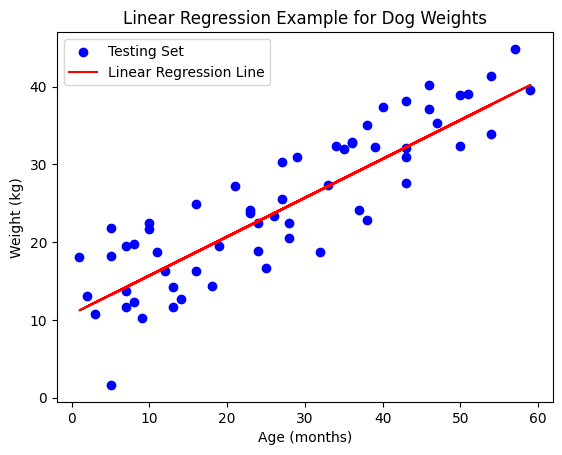

In [16]:
# Plot the results
plt.scatter(X_test, y_test, label='Testing Set', color='blue') # original data points of test dataset
plt.plot(X_test, y_pred, color='red', label='Linear Regression Line') # linear regression line
plt.xlabel('Age (months)')
plt.ylabel('Weight (kg)')
plt.title('Linear Regression Example for Dog Weights')
plt.legend()
plt.show()

### Advantages of linear regression
- Simplicity: Linear regression is straightforward and easy to understand.
- Clear insights: Coefficients provide clear insights into variable relationships.
- Efficiency: Computationally efficient, especially with large datasets.
- Versatility: No strict assumptions about variable distribution.
- Feature selection: Useful for selecting important features.

### Disadvantages of linear regression
- Linearity assumption: Effective only for linear relationships.
- Outlier sensitivity: Impactful sensitivity to outliers.
- Assumption challenges: Assumes independence and homoscedasticity.
- Multicollinearity issues: Problems with highly correlated independent variables.
- Categorical data handling: Not ideal for categorical data without adjustments.
- Overfitting/Underfitting: Vulnerable to overfitting or underfitting without regularization.